In [96]:
# tools and frameworks
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [97]:
##
# Step 1: Pre-processing the lexicon
##

# loading data
lexicon = pd.read_csv("expandedLexicon.tsv", sep="\t")

# dropping negative sentiments
condition = lexicon[lexicon['score'] <= 0].index
lexicon_drop = lexicon.drop(condition)
lexicon = lexicon_drop

# creating token column from term
lexicon['token'] = lexicon['term'].apply(lambda x: x.split('_')[0])


lexicon.head(5)

,term,score,token
0,horrible_noun,3.679601,horrible
1,disgusting_adj,3.493682,disgusting
2,moron_noun,3.469677,moron
3,bastard_noun,3.399238,bastard
4,stupid_noun,3.323882,stupid


In [ ]:
##
# Step 2: Pre-processing the tweet dataset
##

# loading data
hate_speech = pd.read_csv("hatespeech.csv")

# tokenize tweets
hate_speech['tokens'] = hate_speech['tweet'].apply(word_tokenize)


hate_speech

,class,tweet,tokens
0,False,!!! RT @mayasolovely: As a woman you shouldn't...,"[!, !, !, RT, @, mayasolovely, :, As, a, woman..."
1,True,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,"[!, !, !, !, !, RT, @, mleew17, :, boy, dats, ..."
2,True,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,"[!, !, !, !, !, !, !, RT, @, UrKindOfBrand, Da..."
3,True,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!, !, !, !, !, !, !, !, !, RT, @, C_G_Anderso..."
4,True,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!, !, !, !, !, !, !, !, !, !, !, !, !, RT, @,..."
...,...,...,...
24778,True,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,"[you, 's, a, muthaf, *, *, *, in, lie, &, #, 8..."
24779,False,"you've gone and broke the wrong heart baby, an...","[you, 've, gone, and, broke, the, wrong, heart..."
24780,True,young buck wanna eat!!.. dat nigguh like I ain...,"[young, buck, wan, na, eat, !, !, .., dat, nig..."
24781,True,youu got wild bitches tellin you lies,"[youu, got, wild, bitches, tellin, you, lies]"


Text(0, 0.5, 'Classification')

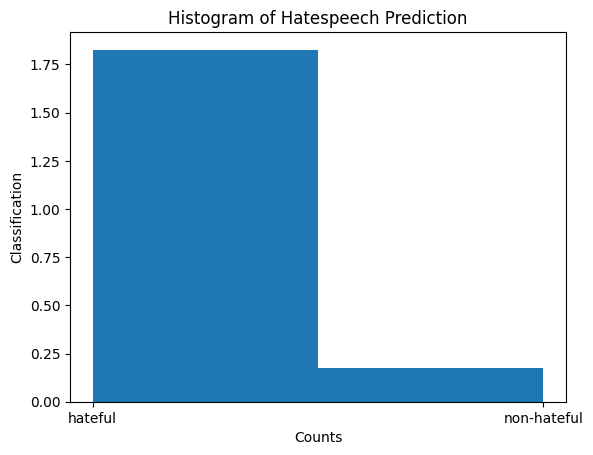

In [ ]:
##
# Step 3: Sentiment Analysis
##

# Option 1
def classify_tweet(tweet, lexicon):
    for word in lexicon['token']:
        if word in tweet:
            return 'hateful'
    return 'non-hateful'

hate_speech['classification'] = hate_speech['tweet'].apply(lambda x: classify_tweet(x, lexicon))

# visualization
plt.hist(hate_speech['classification'], bins=2, density=0.3)
plt.title('Histogram of Hatespeech Prediction')
plt.xlabel('Counts')
plt.ylabel('Classification')


(array([1.3438e+04, 6.8530e+03, 3.0460e+03, 1.0200e+03, 3.1100e+02,
        9.3000e+01, 1.8000e+01, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <BarContainer object of 10 artists>)

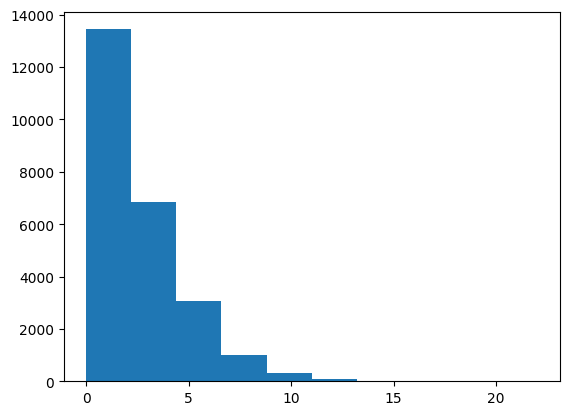

In [ ]:
# Option 2
def count_abusive_words(tweet, lexicon):
    count = sum(word in tweet for word in lexicon['token'])
    return count

hate_speech['abusive_count'] = hate_speech['tweet'].apply(lambda x: count_abusive_words(x, lexicon))

# visualization
plt.hist(hate_speech['abusive_count'])


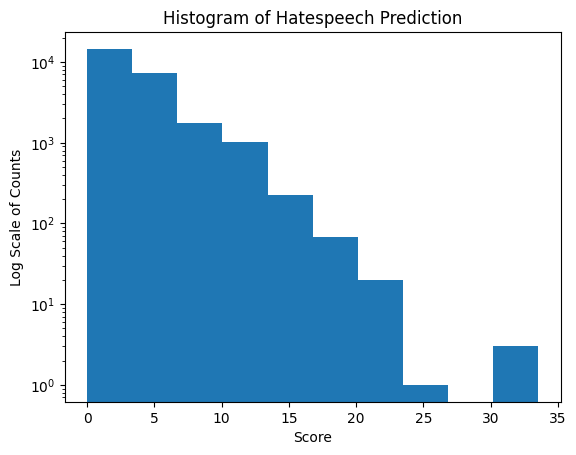

In [101]:
# Option 3
def calculate_sentiment_score(tokens, lexicon):
    return sum(lexicon[lexicon['token'].isin(tokens)]['score'])

hate_speech['sentiment_score'] = hate_speech['tokens'].apply(lambda x: calculate_sentiment_score(x, lexicon))

# visualization
plt.hist(hate_speech['sentiment_score'])
plt.yscale('log')
plt.title('Histogram of Hatespeech Prediction')
plt.xlabel('Score')
plt.ylabel('Log Scale of Counts')
plt.show()